## Project 1 - Regression
## Bitcoin Price Prediction

## Data Description
* Date : Date of observation
* btc_market_price : Average USD market price across major bitcoin exchanges.
* btc_total_bitcoins : The total number of bitcoins that have already been mined.
* btc_market_cap : The total USD value of bitcoin supply in circulation.
* btc_trade_volume : The total USD value of trading volume on major bitcoin exchanges.
* btc_blocks_size : The total size of all block headers and transactions.
* btc_avg_block_size : The average block size in MB.
* btc_n_orphaned_blocks : The total number of blocks mined but ultimately not attached to the main Bitcoin blockchain.
* btc_n_transactions_per_block : The average number of transactions per block.
* btc_median_confirmation_time : The median time for a transaction to be accepted into a mined block.
* btc_hash_rate : The estimated number of tera hashes per second the Bitcoin network is performing.
* btc_difficulty : A relative measure of how difficult it is to find a new block.
* btc_miners_revenue : Total value of coinbase block rewards and transaction fees paid to miners.
* btc_transaction_fees : The total value of all transaction fees paid to miners.
* btc_cost_per_transaction_percent : miners revenue as percentage of the transaction volume.
* btc_cost_per_transaction : miners revenue divided by the number of transactions.
* btc_n_unique_addresses : The total number of unique addresses used on the Bitcoin blockchain.
* btc_n_transactions : The number of daily confirmed Bitcoin transactions.
* btc_n_transactions_total : Total number of transactions.
* btc_n_transactions_excluding_popular : The total number of Bitcoin transactions, excluding the 100 most popular addresses.
* btc_n_transactions_excluding_chains_longer_than_100 : The total number of Bitcoin transactions per day excluding long transaction chains.
* btc_output_volume : The total value of all transaction outputs per day.
* btc_estimated_transaction_volume : The total estimated value of transactions on the Bitcoin blockchain.

In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import glob
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
data = pd.read_csv('bitcoin_dataset.csv')
test = pd.read_csv('test_set.csv')

%matplotlib inline

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 2906 non-null   object 
 1   btc_market_price                                     2906 non-null   float64
 2   btc_total_bitcoins                                   2879 non-null   float64
 3   btc_market_cap                                       2906 non-null   float64
 4   btc_trade_volume                                     2885 non-null   float64
 5   btc_blocks_size                                      2877 non-null   float64
 6   btc_avg_block_size                                   2906 non-null   float64
 7   btc_n_orphaned_blocks                                2906 non-null   int64  
 8   btc_n_transactions_per_block                         2906 non-null  

In [51]:
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [52]:
data.shape

(2906, 24)

In [81]:
data.describe().transpose

<bound method DataFrame.transpose of        btc_market_price  btc_total_bitcoins  btc_market_cap  btc_trade_volume  \
count       2906.000000        2.879000e+03    2.906000e+03      2.885000e+03   
mean         839.104218        1.151138e+07    1.344352e+10      7.398381e+07   
std         2304.972497        4.200024e+06    3.866841e+10      2.924228e+08   
min            0.000000        2.043200e+06    0.000000e+00      0.000000e+00   
25%            6.653465        8.485300e+06    5.363081e+07      2.916456e+05   
50%          235.130000        1.243115e+07    3.346869e+09      1.001414e+07   
75%          594.191164        1.520051e+07    8.075525e+09      2.834038e+07   
max        19498.683330        1.683769e+07    3.270000e+11      5.352016e+09   

       btc_blocks_size  btc_avg_block_size  btc_n_orphaned_blocks  \
count      2877.000000         2906.000000            2906.000000   
mean      35505.502848            0.350366               0.364074   
std       43618.633821    

In [53]:

data.isnull().sum()

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

## Handling Missing Values
Imputing the missing values with the median value

In [54]:
# data1 is created with imputing median in place of missing values
data1 = data.fillna(data.median())
data1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
btc_market_price,2906.0,8.391042e+02,2.304972e+03,0.000000e+00,6.653465e+00,2.351300e+02,5.941912e+02,1.949868e+04
btc_total_bitcoins,2906.0,1.151992e+07,4.181392e+06,2.043200e+06,8.536962e+06,1.243115e+07,1.517080e+07,1.683769e+07
btc_market_cap,2906.0,1.344352e+10,3.866841e+10,0.000000e+00,5.363081e+07,3.346869e+09,8.075525e+09,3.270000e+11
btc_trade_volume,2906.0,7.352154e+07,2.914143e+08,0.000000e+00,2.968431e+05,1.001414e+07,2.823617e+07,5.352016e+09
btc_blocks_size,2906.0,3.530270e+04,4.344737e+04,0.000000e+00,8.015000e+02,1.518300e+04,5.742650e+04,1.544446e+05
btc_avg_block_size,2906.0,3.503659e-01,3.531685e-01,2.163350e-04,2.417726e-02,1.960218e-01,6.760651e-01,1.110327e+00
btc_n_orphaned_blocks,2906.0,3.640743e-01,8.422593e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00
btc_n_transactions_per_block,2906.0,6.716737e+02,6.895613e+02,1.000000e+00,5.400000e+01,3.750000e+02,1.232995e+03,2.722625e+03
btc_median_confirmation_time,2906.0,7.502829e+00,4.964336e+00,0.000000e+00,6.066667e+00,7.916667e+00,1.015000e+01,4.773333e+01
btc_hash_rate,2906.0,1.244070e+06,2.924141e+06,2.250000e-05,1.160880e+01,2.176189e+04,1.035363e+06,2.160975e+07


# Correlation Matrix

<AxesSubplot:>

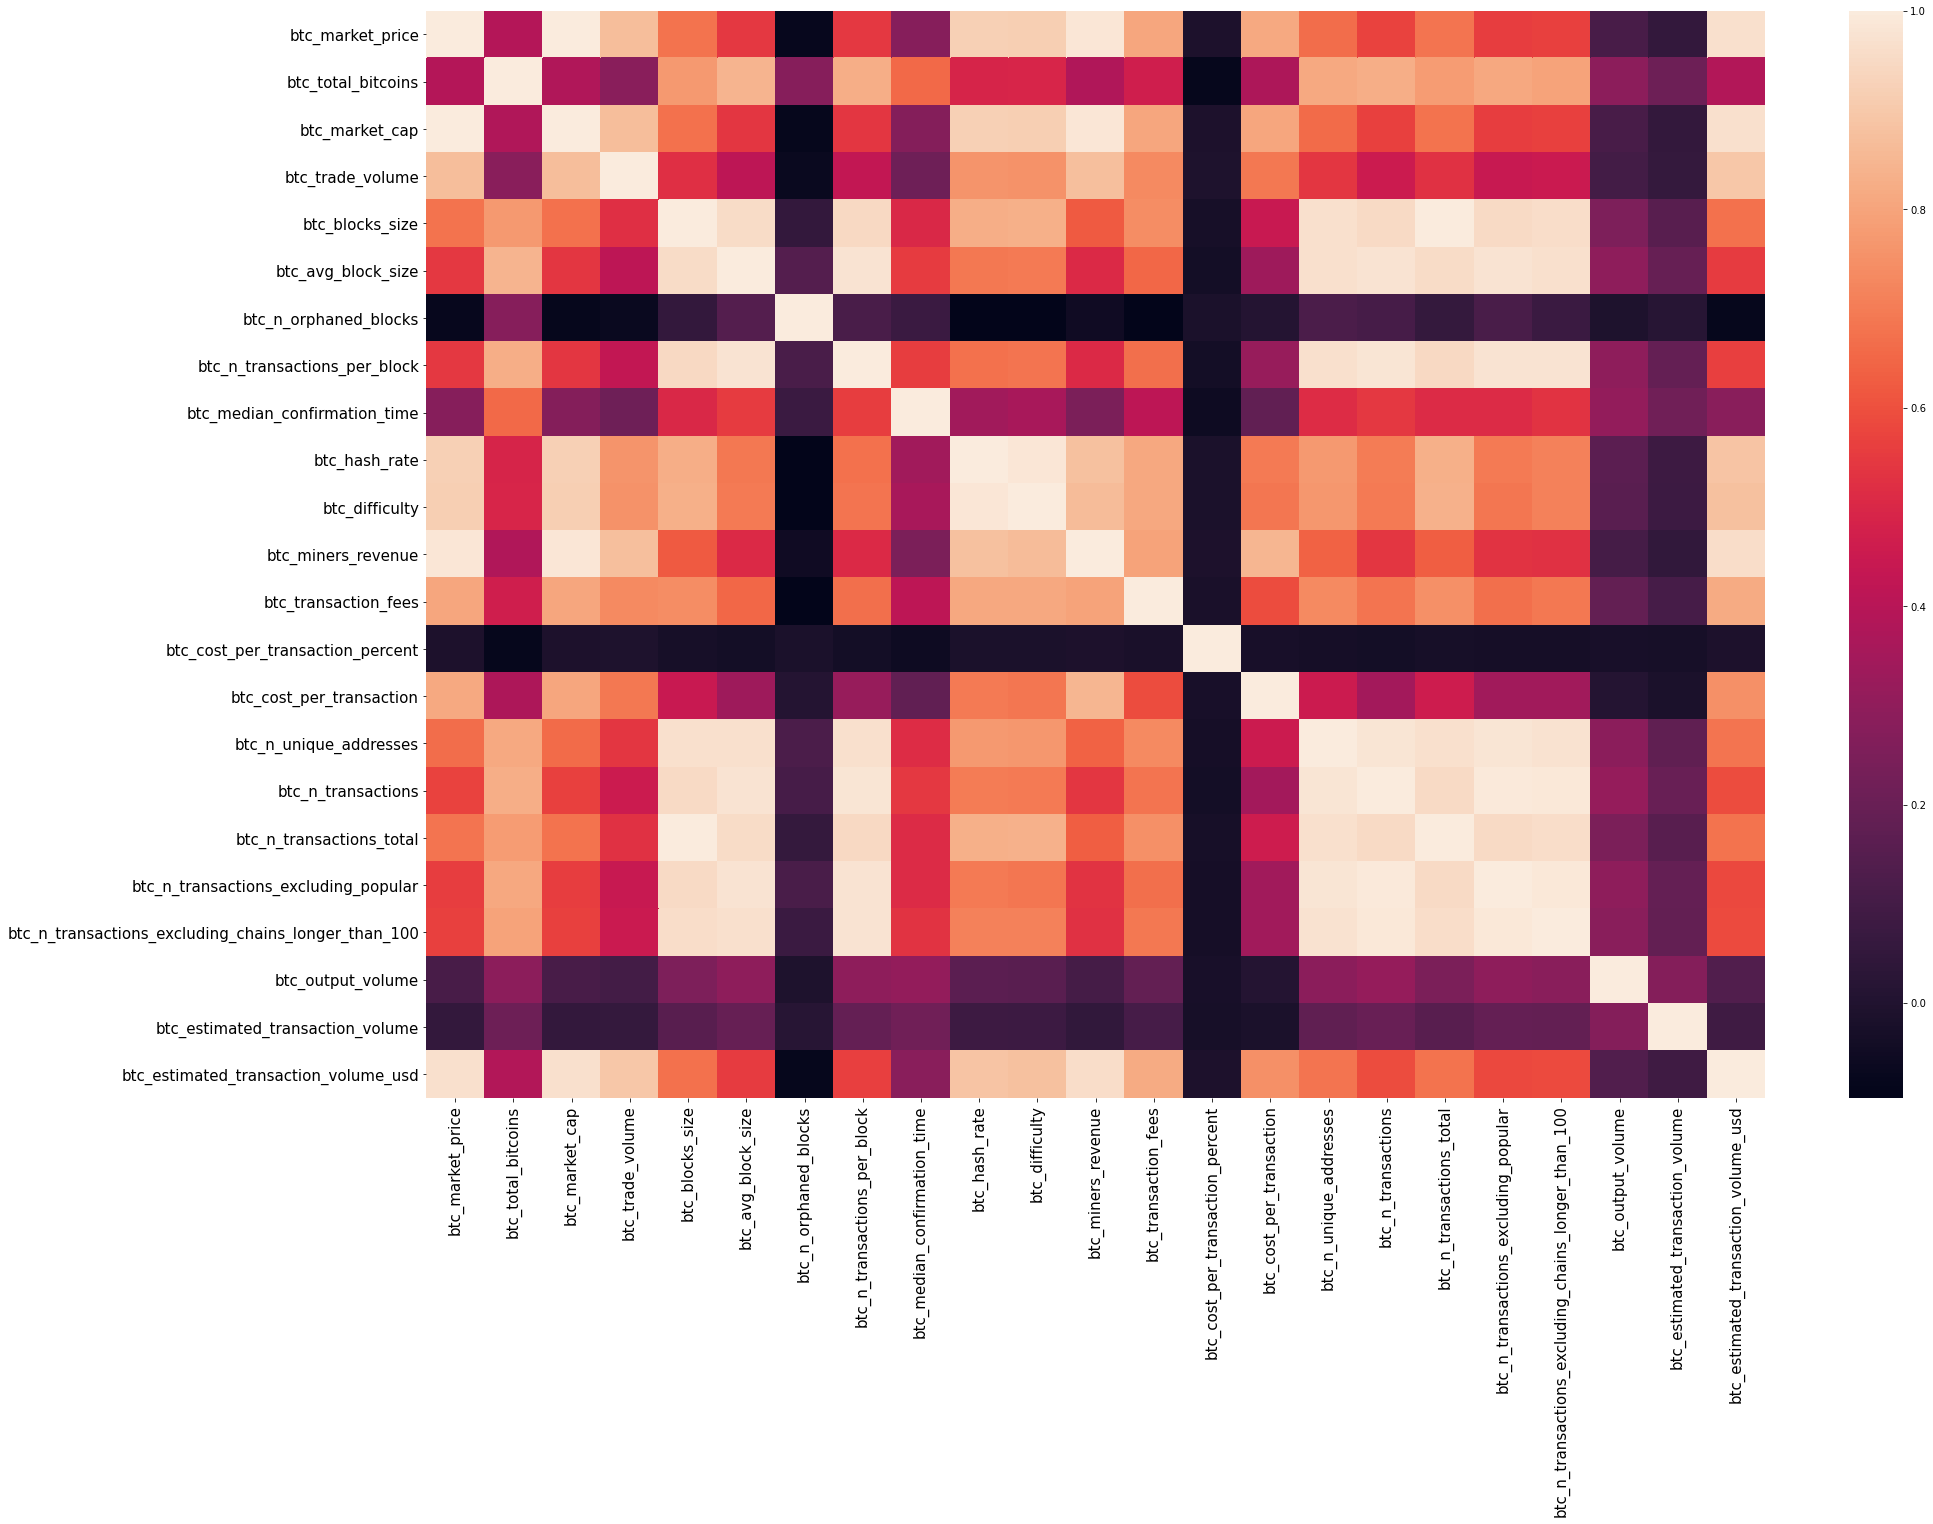

In [9]:
plt.figure(figsize=(30,20))
plt.tick_params(axis='both',labelsize=15)
sns.heatmap(data1.corr())

The correlation of btcmarket price and btc_market_cap, btc_trade_value, btc_hash_rate, btc_difficulty, btc_minors_revenue and btc_transaction_fees is found to be very high.

# Explanatory Data Analysis

(array([2649.,   93.,   65.,   23.,   11.,   21.,    6.,   21.,   12.,
           5.]),
 array([    0.      ,  1949.868333,  3899.736666,  5849.604999,
         7799.473332,  9749.341665, 11699.209998, 13649.078331,
        15598.946664, 17548.814997, 19498.68333 ]),
 <BarContainer object of 10 artists>)

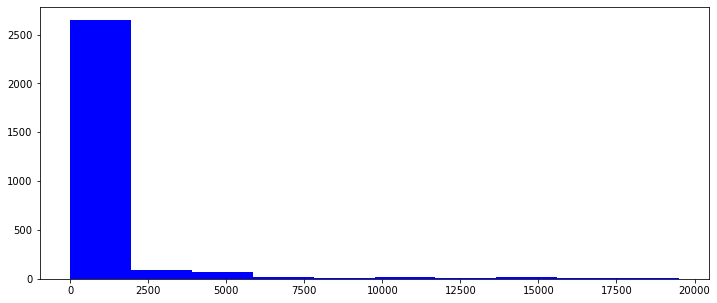

In [82]:
# Histogram to see the distribution on Bitcoin Market price
plt.figure(figsize=(12,5))
plt.hist(data1['btc_market_price'],bins=10,color='blue')

<AxesSubplot:xlabel='btc_market_cap', ylabel='btc_market_price'>

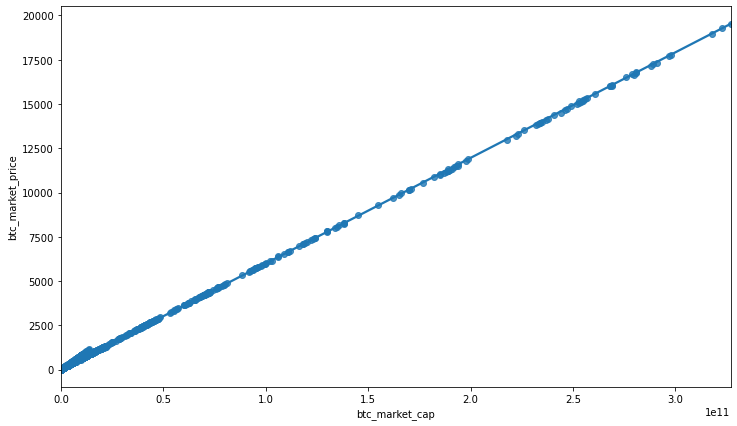

In [83]:
#Scatterplot between Bitcoin price & Bitcoin Market cap
plt.figure(figsize=(12,7))
sns.regplot(x=data1['btc_market_cap'],y=data1['btc_market_price'],data=data1)

<AxesSubplot:xlabel='btc_trade_volume', ylabel='btc_market_price'>

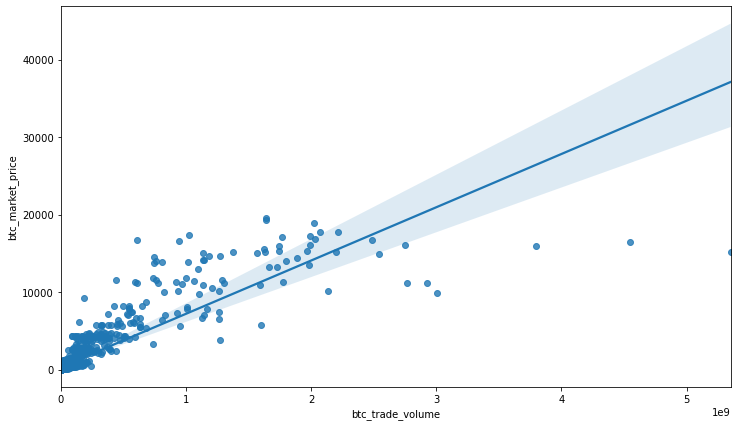

In [84]:
#Scatterplot between Bitcoin price & Bitcoin Trade Volume
plt.figure(figsize=(12,7))
sns.regplot(x=data1['btc_trade_volume'],y=data1['btc_market_price'],data=data1)

<AxesSubplot:xlabel='btc_hash_rate', ylabel='btc_market_price'>

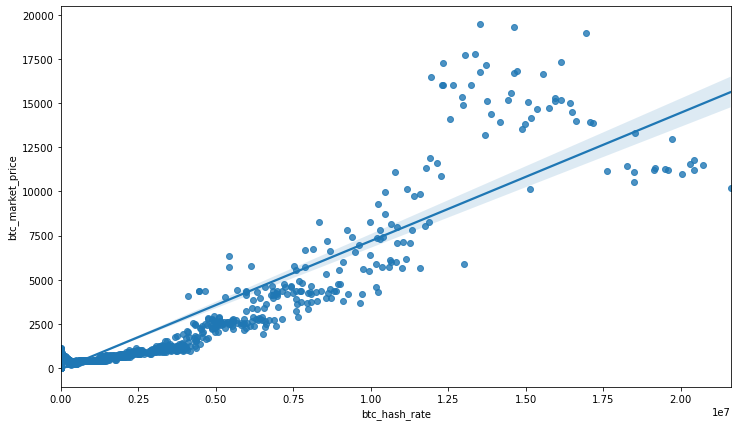

In [85]:
#Scatterplot between Bitcoin price & Bitcoin hash rate
plt.figure(figsize=(12,7))
sns.regplot(x=data1['btc_hash_rate'],y=data1['btc_market_price'],data=data1)

<AxesSubplot:xlabel='btc_miners_revenue', ylabel='btc_market_price'>

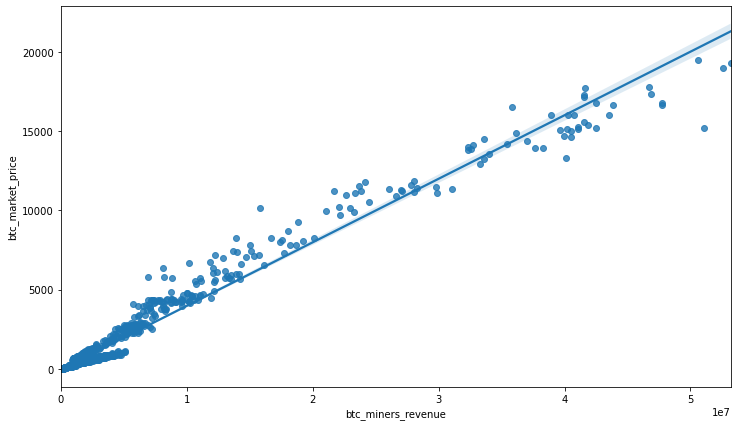

In [59]:
#Scatterplot between Bitcoin price & Bitcoin Miners Revenue
plt.figure(figsize=(12,7))
sns.regplot(x=data1['btc_miners_revenue'],y=data1['btc_market_price'],data=data1)

<AxesSubplot:xlabel='btc_miners_revenue', ylabel='btc_transaction_fees'>

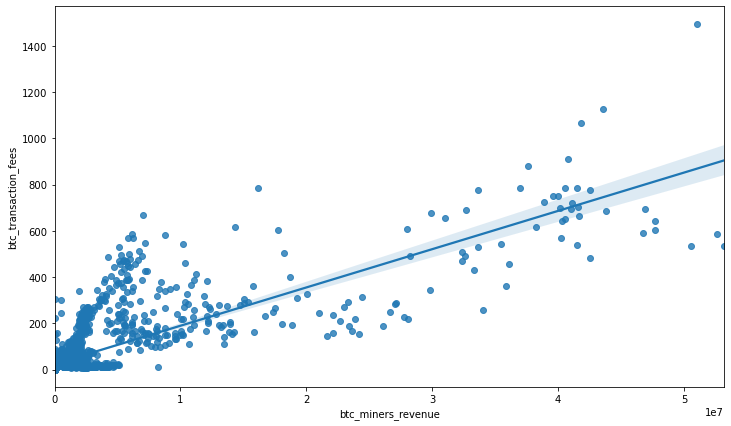

In [60]:
#Scatterplot between Bitcoin price & Bitcoin Transaction fees
plt.figure(figsize=(12,7))
sns.regplot(x=data1['btc_miners_revenue'],y=data1['btc_transaction_fees'],data=data1)

(<AxesSubplot:title={'center':'Trading volume on major bitcoin Trend'}, xlabel='Date'>,
 Text(0.5, 1.0, 'Trading volume on major bitcoin Trend'))

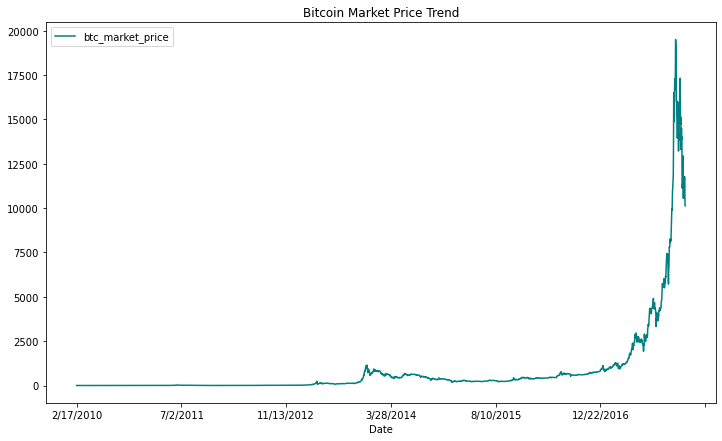

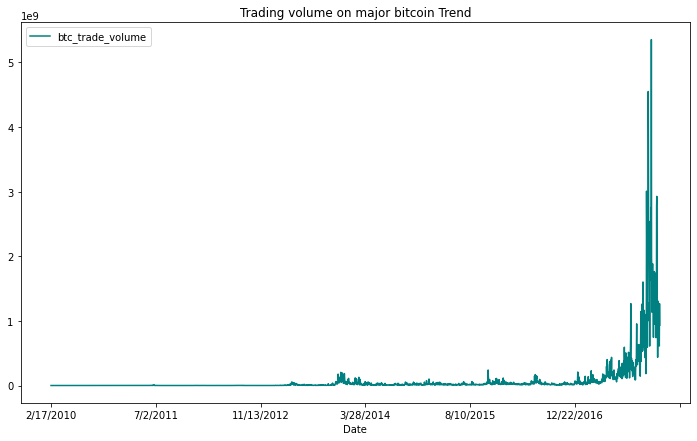

In [61]:
# Line chart for Bitcoin Market Price and Bitcoin Trade Volume trend
data1.plot(x='Date',y='btc_market_price',figsize=(12,7),kind='line',color='teal'),plt.title('Bitcoin Market Price Trend')
data1.plot(x='Date',y='btc_trade_volume',figsize=(12,7),kind='line',color='teal'),plt.title('Trading volume on major bitcoin Trend')

Dropping the date column

In [62]:
# Dropping date column
data1.drop(['Date'],axis=1,inplace=True)

# Models & Prediction 

# TRAIN AND TEST DATA SPLITTING

In [64]:
# Defining independent and dependent variables
y = data1['btc_market_price']
X = data1.drop(['btc_market_price'],axis=1)


In [65]:
# Defining train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


# TRAIN AND TEST DATA SPLITTING

In [66]:
# Using Min-Max scaler for scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [67]:
# Scaling
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


# 1. Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn import linear_model
lreg = linear_model.LinearRegression()

lreg.fit(X_train, y_train)
print('Train Score: ',lreg.score(X_train, y_train))
print('Test Score: ',lreg.score(X_test, y_test))
y_pred = lreg.predict(X_test)
print('MSE: ',mean_squared_error(y_test, y_pred))

Train Score:  0.9999343396973506
Test Score:  0.98954609449239
MSE:  65780.88129024554


# 2. POLYNOMIAL REGRESSION

In [24]:
from  sklearn.preprocessing  import PolynomialFeatures
train_score_list = []
test_score_list = []
mse = []

for n in range(2,4):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))
    y_pred = lreg.predict(X_test_poly)
    mse.append(mean_squared_error(y_test, y_pred))
    
print(train_score_list)
print(test_score_list)
print(mse)

[0.999997507145263, 1.0]
[-57674376.775757246, -113048.4647281418]
[362914261583295.7, 711360305848.774]


# LASSO REGRESSION

Text(0.5, 0, '$\\alpha$')

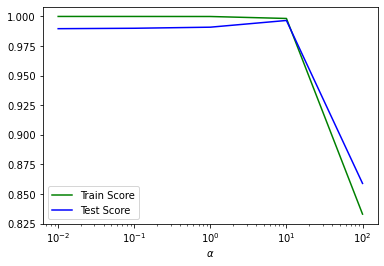

In [25]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))
    
    
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [26]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
np.random.seed(0)
    
x_range = [0.01, 0.1, 1, 10, 100]
tuned_parameters = [{'alpha':x_range}]

lasso = Lasso(max_iter=1000,tol=0.1,random_state=0)
gri=GridSearchCV(lasso,tuned_parameters,cv=5, return_train_score= True, iid = False)
gri_model=gri.fit(X_train,y_train)

print(gri_model.best_params_)
print('validation score: ', gri_model.best_score_)
y_pred= gri_model.score(X_test,y_test)
print(y_pred)

{'alpha': 0.1}
validation score:  0.9862251771451094
0.9791945908482065


In [27]:
y_pred = gri_model.predict(X_test)
print(gri_model.score(X_train,y_train))
print(gri_model.score(X_test,y_test))
print(mean_squared_error(y_test, y_pred))

0.9862324428455034
0.9791945908482065
130917.401980803


# Ridge Regression

Text(0.5, 0, '$\\alpha$')

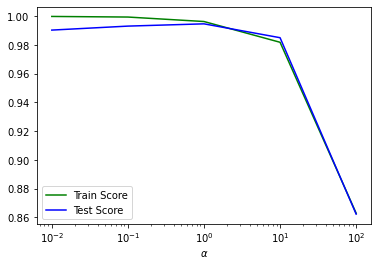

In [28]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [69]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
np.random.seed(0)
    
x_range = [0.01, 0.1, 1, 10, 100]
tuned_parameters = [{'alpha':x_range}]

ridge = Ridge(max_iter=1000,tol=0.1,random_state=0)
gri1=GridSearchCV(ridge,tuned_parameters,cv=5, return_train_score= True, iid = False)
gri_model1=gri1.fit(X_train,y_train)

print(gri1.best_params_)
print('validation score: ', gri1.best_score_)
y_pred1= gri_model1.score(X_test,y_test)
print(y_pred1)

{'alpha': 0.01}
validation score:  0.99990050470992
0.99041154200547


In [70]:
y_pred = gri_model1.predict(X_test)
print(gri_model1.score(X_train,y_train))
print(gri_model1.score(X_test,y_test))
print(mean_squared_error(y_test, y_pred))

0.99991880012681
0.99041154200547
60335.0792328792


# KNEIGHBORS REGRESSOR

Text(0, 0.5, 'Accuracy')

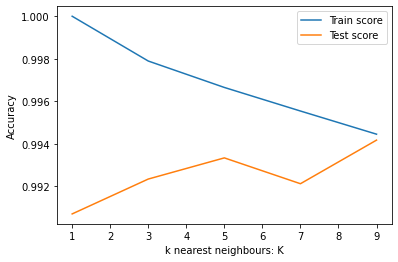

In [71]:
k_range = range(1,10,2)
train_score_knn = []
test_score_knn = []

for k in k_range:
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)
    train_score_knn.append(neigh.score(X_train, y_train))
    test_score_knn.append(neigh.score(X_test, y_test))
    

plt.plot(k_range, train_score_knn, label = 'Train score')
plt.plot(k_range, test_score_knn, label = 'Test score')
plt.legend()
plt.xlabel('k nearest neighbours: K')
plt.ylabel('Accuracy')

In [78]:
x_range_1 = range(1,6,2)
tuned_parameters=dict(n_neighbors=x_range_1)

knn_reg = KNeighborsRegressor()
gri12=GridSearchCV(knn_reg,tuned_parameters,cv=3,iid = False)
gri_model12=gri12.fit(X_train,y_train)

print(gri_model12.best_params_)
print('validation score: ', gri_model12.best_score_)
y_pred12= gri_model12.score(X_test,y_test)
print(y_pred12)

{'n_neighbors': 3}
validation score:  0.9929175797879969
0.9923461109174724


In [79]:
print(gri_model12.score(X_train,y_train))
print(gri_model12.score(X_test,y_test))
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

0.9978946631048464
0.9923461109174724
6366512.879556164


# SGD Regressor

In [72]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 100000, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_train, y_train)
print(sgd_reg.score(X_train, y_train))
print(sgd_reg.score(X_test, y_test))

print("SGD regression coefficient: " + str(sgd_reg.coef_))
print("SGD regression intercept: " + str(sgd_reg.intercept_))
print("SGD regression iterations: " + str(sgd_reg.n_iter_))

-3126946.6499027903
-8061515.133306212
SGD regression coefficient: [ 4.37993438e+06  4.52719852e+08  1.79568778e+07  1.26458046e+08
 -2.91191808e+06  4.37790561e+05 -1.02670617e+07 -4.85280477e+06
  9.07301842e+07 -1.45205943e+08 -4.80160897e+08  3.58995398e+07
  3.87677343e+06  4.57907518e+07  1.80634181e+07  5.44016938e+07
 -1.55773717e+08  2.26943983e+07 -4.51515141e+07 -6.00655791e+06
  1.74720081e+06 -3.43392847e+07]
SGD regression intercept: [-2292771.13582607]
SGD regression iterations: 555


In [73]:
y_pred = sgd_reg.predict(X_test)
print(mean_squared_error(y_test, y_pred))

50726844182624.32


# SVM REGRESSOR

## Linear Kernel 

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

tuning_parameters = {'C':[0.1, 1], 'kernel':['linear']}

svm_grid = GridSearchCV(svm.SVR(), param_grid=tuning_parameters,cv=3)
svm_model_linear=svm_grid.fit(X_train,y_train) 
print(svm_model_linear.best_params_)
print('Validation score:', svm_model_linear.best_score_)

{'C': 1, 'kernel': 'linear'}
Validation score: 0.10946449125712714


In [36]:
y_pred = svm_model_linear.predict(X_test)
print(svm_model_linear.score(X_train,y_train))
print(svm_model_linear.score(X_test,y_test))
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))


0.13964055682798393
0.13205434718440867
5461521.525393971


## RBF

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

tuning_parameters = {'C':[0.1, 1], 'kernel':['rbf']}

svm_grid = GridSearchCV(svm.SVR(), param_grid=tuning_parameters,cv=3)
svm_model_rbf=svm_grid.fit(X_train,y_train) 
print(svm_model_rbf.best_params_)
print('Validation score:', svm_model_rbf.best_score_)

{'C': 1, 'kernel': 'rbf'}
Validation score: -0.020253169954769373


In [75]:
y_pred = svm_model_rbf.predict(X_test)
print(svm_model_rbf.score(X_train,y_train))
print(svm_model_rbf.score(X_test,y_test))
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

0.0017056670787247707
-0.011766986857501882
6366512.879556164


## Poly Kernel

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

tuning_parameters = {'C':[0.1,1], 'kernel':['poly']}

svm_grid = GridSearchCV(svm.SVR(), param_grid=tuning_parameters,cv=3)
svm_model_poly=svm_grid.fit(X_train,y_train) 
print(svm_model_poly.best_params_)
print('Validation score:', svm_model_poly.best_score_)

{'C': 1, 'kernel': 'poly'}
Validation score: 0.976955227103199


In [38]:
y_pred = svm_model_poly.predict(X_test)
print(svm_model_poly.score(X_train,y_train))
print(svm_model_poly.score(X_test,y_test))
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

0.9823267380912294
0.9800482415266755
125545.83114511546


## Decision Tree Regressor

In [77]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=4)
clf.fit(X=X_train, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.9985452715349865 {'max_depth': 7}


In [41]:
y_pred = clf.predict(X_test)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

0.9999611998050185
0.9882195466196524
74128.14328518634


# Conclusion 

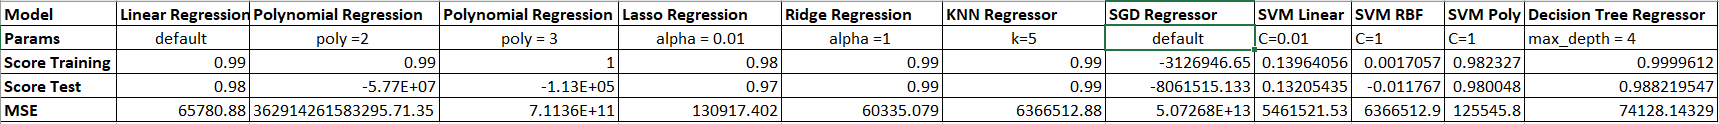

## From the metrics table above, we see the MSE Value is smallest for Linear Regresion and Ridge Regression and the best model for predicting the target variable.